## Dataset

NYPD Shooting Incident Dataset

- Description: Historical NYC shooting data, detailing incidents and outcomes (fatal or non-fatal).
- Columns: Includes BORO, PERP_AGE_GROUP, VIC_AGE_GROUP, STATISTICAL_MURDER_FLAG, etc.
- Purpose: Classify shootings as fatal or non-fatal to improve law enforcement strategies.
- Applications: Crime analysis, predictive modeling, resource allocation.
- Analysis Tasks: Data exploration, feature engineering, model building, and evaluation.
- Relevance: Supports data-driven public safety measures and resource optimization.

## Step 1: Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,  confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading the Dataset

In [100]:
data=pd.read_csv(r"C:\Users\pvaib\Downloads\NYPD_Shooting_Incident_Data__Historic_ (1).csv")

In [101]:
data.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1058925.000,180924.0000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1005028.000,234516.0000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1007667.938,209836.5313,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10-09-2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1006537.375,244511.1406,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1024921.813,262189.4063,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [103]:
data.columns.values

array(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO',
       'LOC_OF_OCCUR_DESC', 'PRECINCT', 'JURISDICTION_CODE',
       'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
       'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP',
       'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lon_Lat'], dtype=object)

In [104]:
data.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.731200e+04,27312.000000,27310.000000,2.731200e+04,27312.000000,27302.000000,27302.000000
mean,1.208605e+08,65.635362,0.326913,1.009449e+06,208127.401617,40.737892,-73.909051
std,7.341286e+07,27.305705,0.737743,1.837783e+04,31886.377756,0.087525,0.066272
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718800,40.511586,-74.249303
25%,6.386088e+07,44.000000,0.000000,1.000029e+06,182834.335950,40.668481,-73.943027
50%,9.037222e+07,68.000000,0.000000,1.007731e+06,194486.570300,40.700318,-73.915221
75%,1.888102e+08,81.000000,0.000000,1.016838e+06,239518.468800,40.824067,-73.882330
max,2.611902e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [105]:
data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

## Step 3: Data Preprocessing

In [106]:
# Remove rows with missing target variable values
data= data.dropna(subset=['STATISTICAL_MURDER_FLAG'])

In [107]:
# Fill missing values in other columns 
data.fillna(method='ffill', inplace=True)

In [108]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  int32  
 2   OCCUR_TIME               27312 non-null  int32  
 3   BORO                     27312 non-null  int32  
 4   LOC_OF_OCCUR_DESC        27312 non-null  int32  
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27312 non-null  float64
 7   LOC_CLASSFCTN_DESC       27312 non-null  int32  
 8   LOCATION_DESC            27312 non-null  int32  
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           27312 non-null  int32  
 11  PERP_SEX                 27312 non-null  int32  
 12  PERP_RACE                27312 non-null  int32  
 13  VIC_AGE_GROUP            27312 non-null  int32  
 14  VIC_SEX               

In [110]:
# Check for class imbalance
print(data['STATISTICAL_MURDER_FLAG'].value_counts())

STATISTICAL_MURDER_FLAG
False    22046
True      5266
Name: count, dtype: int64


In [111]:
X = data.drop('STATISTICAL_MURDER_FLAG', axis=1)
y = data['STATISTICAL_MURDER_FLAG']

In [112]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [113]:
# Scaling numerical features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [114]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.3, random_state=42)

## Step 4: Exploratory Data Analysis
- To understand patterns & potentially form some hypothesis

## 1. Distribution of STATISTICAL_MURDER_FLAG

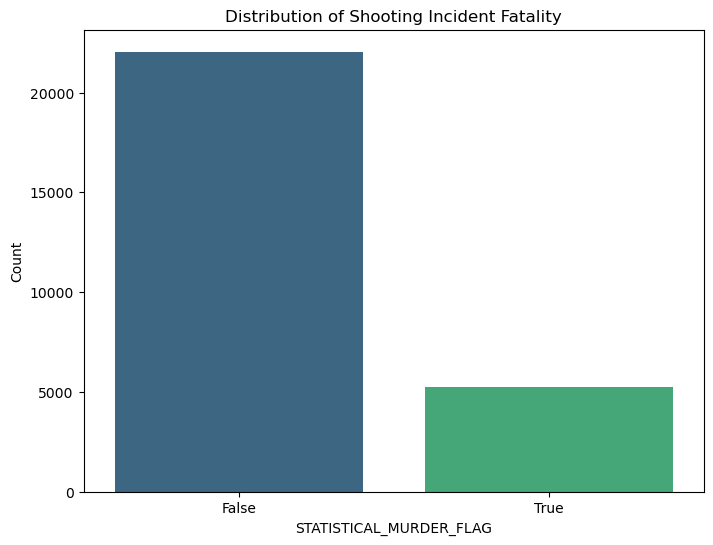

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(x='STATISTICAL_MURDER_FLAG', data=data, palette='viridis')
plt.title('Distribution of Shooting Incident Fatality')
plt.xlabel('STATISTICAL_MURDER_FLAG')
plt.ylabel('Count')
plt.show()

## 2. Distribution of incidents by borough

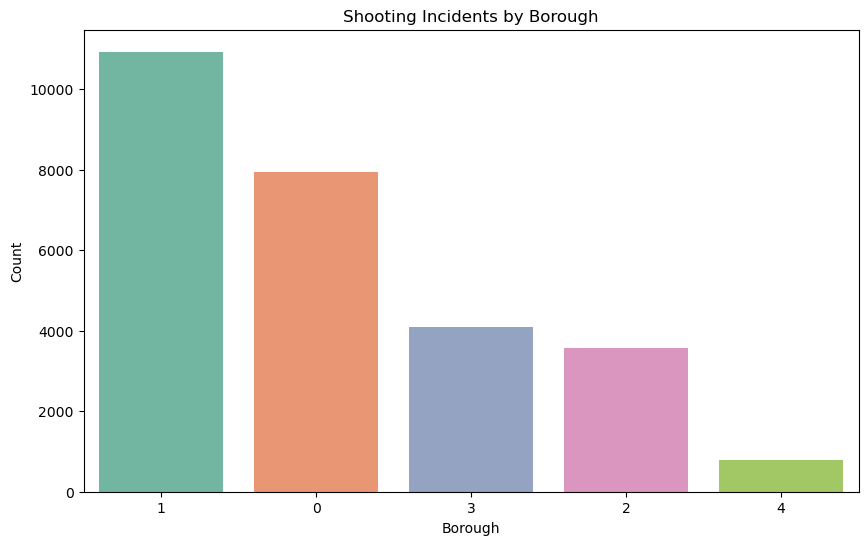

In [116]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO', data=data, palette='Set2', order=data['BORO'].value_counts().index)
plt.title('Shooting Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

## 3. Correlation heatmap

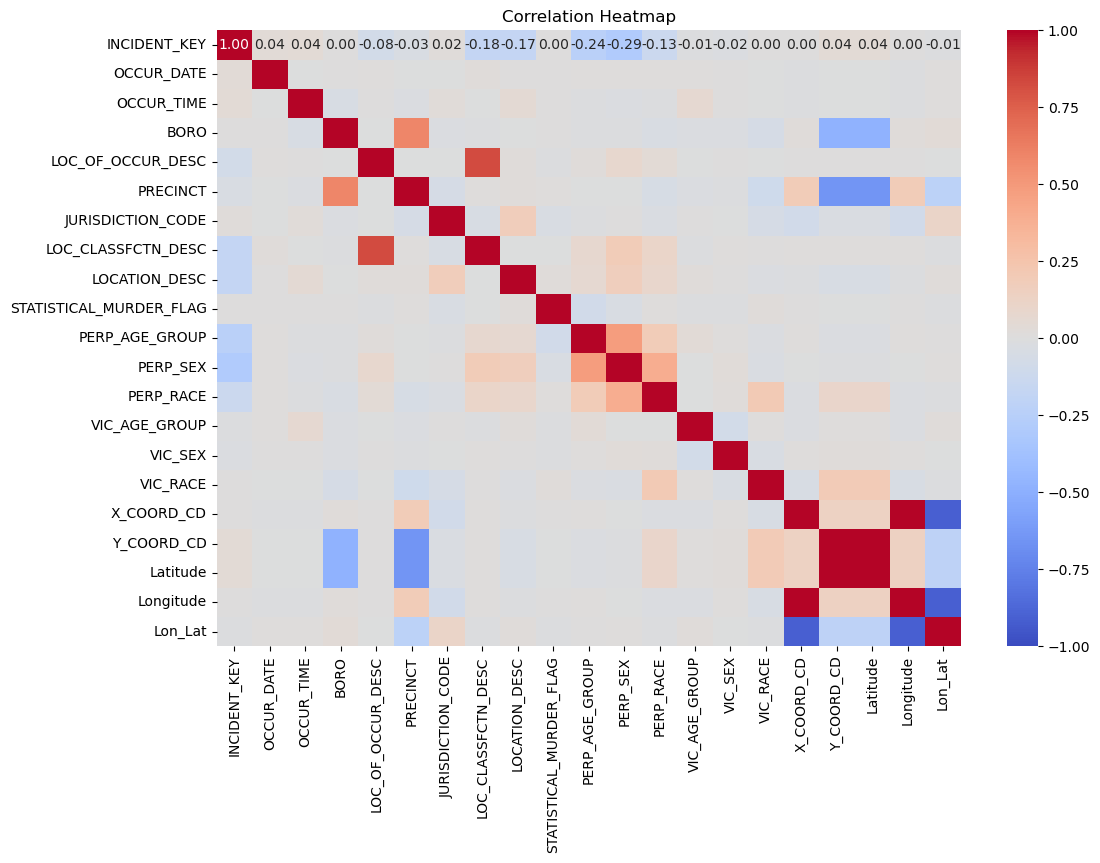

In [117]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## 4. Distribution of shooting incidents by age group

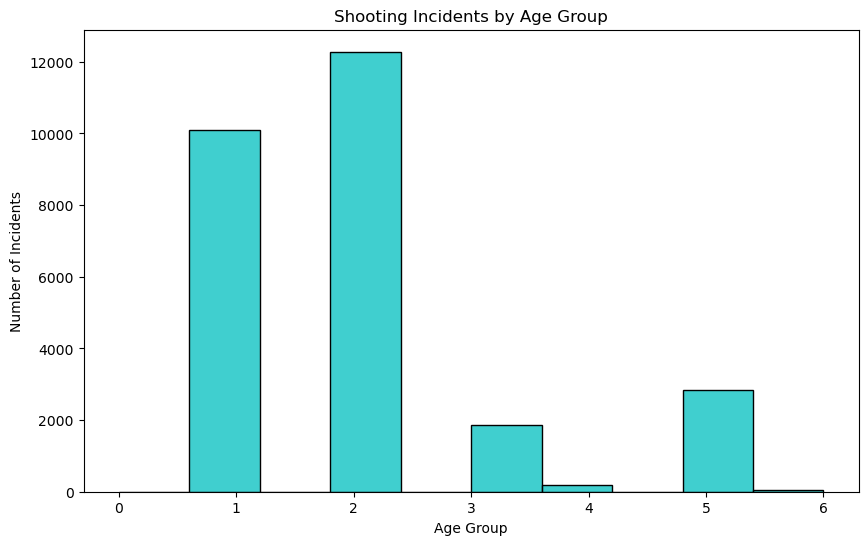

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data['VIC_AGE_GROUP'], kde=False, color='c', bins=10)
plt.title('Shooting Incidents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Incidents')
plt.show()

## 5. Distribution of Victim Gender

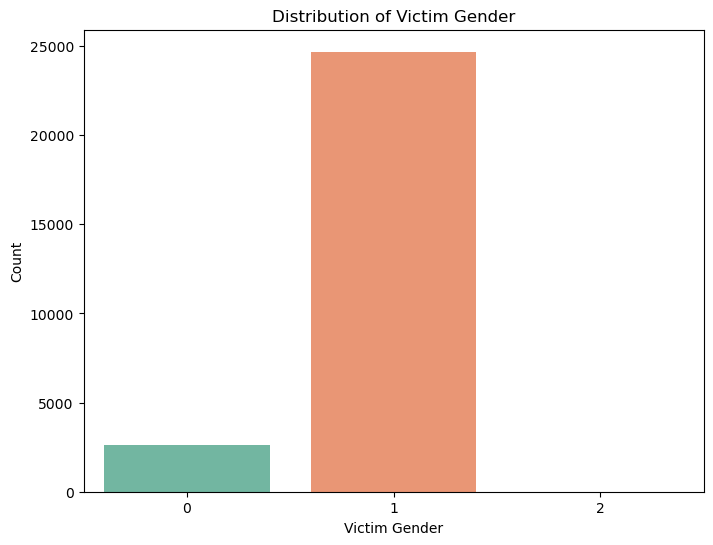

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='VIC_SEX', palette='Set2')
plt.title('Distribution of Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.show()

## 6. Geographical Distibution of Shooting Incidents

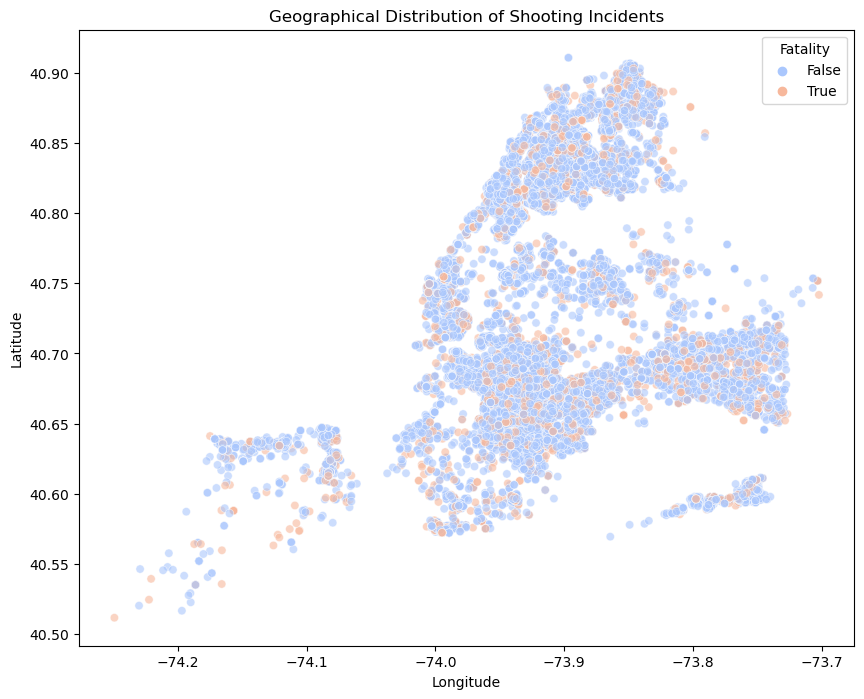

In [120]:
# Scatter plot of shooting incidents locations
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='STATISTICAL_MURDER_FLAG', data=data, palette='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of Shooting Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fatality')
plt.show()

## Step 5: Predictive Modeling-ML Algorithm
Developing 
- Random Forest, 
- Gradient Boosting
- SVM
- XGBoost

and compare them

## 1. Random Forest

In [121]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [122]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8382219534321137
Precision: 0.8749376351238982
Recall: 0.7912468040306813
[[5827  752]
 [1388 5261]]
              precision    recall  f1-score   support

       False       0.81      0.89      0.84      6579
        True       0.87      0.79      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.84      0.84      0.84     13228
weighted avg       0.84      0.84      0.84     13228



## Hyperparameter Tuning for Random Forest

In [123]:
# Define the model
rf = RandomForestClassifier(random_state=42)

In [124]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

In [125]:
# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=1)

In [126]:
# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=1)

In [127]:
# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [128]:
print(f"--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

--- Random Forest ---
              precision    recall  f1-score   support

       False       0.81      0.89      0.84      6579
        True       0.87      0.79      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.84      0.84      0.84     13228
weighted avg       0.84      0.84      0.84     13228

Accuracy: 0.8382219534321137


## 2. Gradient Boosting

In [129]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [130]:
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Precision: {precision_score(y_test, y_pred_gb)}")
print(f"Recall: {recall_score(y_test, y_pred_gb)}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
Accuracy: 0.7819776232234654
Precision: 0.8143262648188345
Recall: 0.7334937584599188
[[5467 1112]
 [1772 4877]]
              precision    recall  f1-score   support

       False       0.76      0.83      0.79      6579
        True       0.81      0.73      0.77      6649

    accuracy                           0.78     13228
   macro avg       0.78      0.78      0.78     13228
weighted avg       0.78      0.78      0.78     13228



## Hyperparameter Tuning for Gradient Boosting

In [131]:
# Define the model
gb = GradientBoostingClassifier(random_state=42)

In [132]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}

In [133]:
# Set up GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=1)

In [134]:
# Fit the model
grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=1)

In [135]:
# Best parameters
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [136]:
print(f"--- Gradient Boosting ---")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")

--- Gradient Boosting ---
              precision    recall  f1-score   support

       False       0.76      0.83      0.79      6579
        True       0.81      0.73      0.77      6649

    accuracy                           0.78     13228
   macro avg       0.78      0.78      0.78     13228
weighted avg       0.78      0.78      0.78     13228

Accuracy: 0.7819776232234654


## 3. Support Vector Machine

In [137]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [138]:
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.7461445418808588
Precision: 0.7860246827742048
Recall: 0.6801022710181982
[[5348 1231]
 [2127 4522]]
              precision    recall  f1-score   support

       False       0.72      0.81      0.76      6579
        True       0.79      0.68      0.73      6649

    accuracy                           0.75     13228
   macro avg       0.75      0.75      0.75     13228
weighted avg       0.75      0.75      0.75     13228



## Hyperparameter Tuning for SVM

In [139]:
# Define the model
svm = SVC(random_state=42)

In [140]:
# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [141]:
# Set up GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=1)

In [142]:
# Fit the model
grid_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [143]:
# Best parameters
print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [144]:
print(f"--- Support Vector Machine ---")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")

--- Support Vector Machine ---
              precision    recall  f1-score   support

       False       0.72      0.81      0.76      6579
        True       0.79      0.68      0.73      6649

    accuracy                           0.75     13228
   macro avg       0.75      0.75      0.75     13228
weighted avg       0.75      0.75      0.75     13228

Accuracy: 0.7461445418808588


## 4. XGBoost

In [148]:
from xgboost import XGBClassifier

In [149]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [150]:
# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [161]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [162]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[5951  628]
 [1557 5092]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.90      0.84      6579
        True       0.89      0.77      0.82      6649

    accuracy                           0.83     13228
   macro avg       0.84      0.84      0.83     13228
weighted avg       0.84      0.83      0.83     13228



## Hyperparameter Tuning for XGBoost

In [153]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

In [154]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)


In [155]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [156]:
# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Score:  0.8413037843442197


In [163]:
# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

In [164]:
# Evaluate the best model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[5945  634]
 [1442 5207]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.90      0.85      6579
        True       0.89      0.78      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.85      0.84      0.84     13228
weighted avg       0.85      0.84      0.84     13228



## Step 6: Model Comparison

In [165]:
# Model Performance Metrics
models = ['Random Forest', 'Gradient Boosting', 'SVM','XGBoost']
accuracy = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_xgb)]
precision = [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_svm),precision_score(y_test, y_pred_xgb)]
recall = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_svm),recall_score(y_test, y_pred_xgb)]

In [166]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

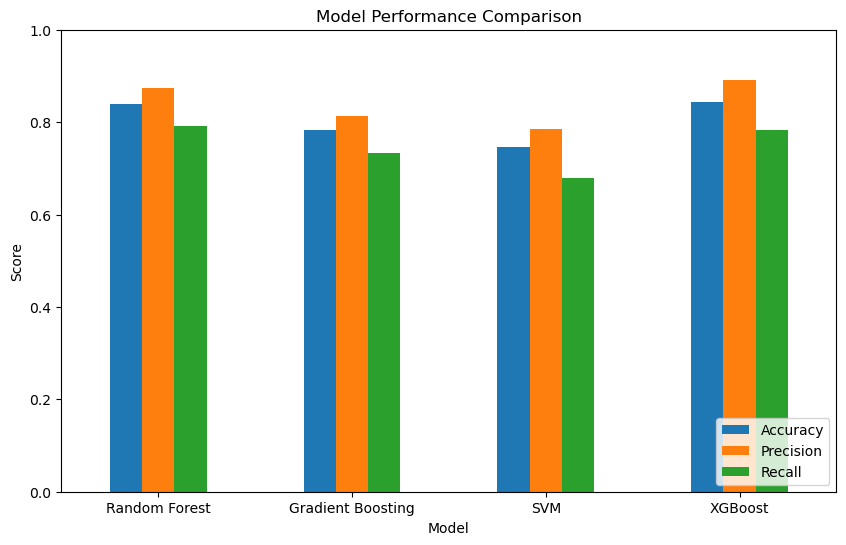

In [167]:
# Plotting the Comparison
comparison_df.set_index('Model', inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()